<a href="https://colab.research.google.com/github/ucfilho/Dam_Project_Methods/blob/master/Metodo_09_xgboost_campo_BL3_nov_19_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# carrega bibliotecas principais
import numpy as np
import pandas as pd
from pandas import read_excel
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
!git clone https://github.com/ucfilho/Dam_Project_Methods #clonar do Github
%cd Dam_Project_Methods
import Go2Confusion


fatal: destination path 'Dam_Project_Methods' already exists and is not an empty directory.
/content/Dam_Project_Methods


In [0]:
# clicar no botao e selecionar o arquivo
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving Planilha de campo_BL3.xlsx to Planilha de campo_BL3 (1).xlsx


In [0]:
my_sheet = 'Planilha_Campo_Ok'
file_name = 'Planilha de campo_BL3.xlsx' # name of your excel file
df = read_excel(file_name, sheet_name = my_sheet,header=1)

In [0]:

Nomes=['Est','Par','CAP(cm)','DAP','H(m)','Nome comum'] # neste caso nao tem cm em DAP e Parc esta como Par
XY=df[Nomes]
XY=XY.dropna()


In [0]:
numbers = np.unique(XY['Nome comum'], return_inverse=True)
#print(numbers)

In [0]:
XY['Tree']=pd.Series(numbers[1])
#print(XY)

In [0]:
print(XY)

     Est   Par  CAP(cm)        DAP  H(m)           Nome comum  Tree
0      1   1.0     62.0  19.735213   9.0                 tapi   105
1      1   1.0     17.0   5.411268   5.0                morta    81
2      1   1.0     64.0  20.371833  10.0                 tapi   105
3      1   1.0     87.0  27.692960  11.0                 tapi   105
4      1   1.0     33.0  10.504226  10.0        sangra-d'água   103
...   ..   ...      ...        ...   ...                  ...   ...
1177   1  24.0     40.0  12.732395   8.0          ipê-amarelo    63
1178   1  24.0     17.0   5.411268   6.0  capororoca-vermelha    37
1179   1  24.0     24.0   7.639437   4.5      goiabeira-brava    56
1180   1  24.0     27.0   8.594367   7.0          ipê-amarelo    63
1181   1  24.0     73.0  23.236622  11.0      vassourão-preto   107

[1182 rows x 7 columns]


In [0]:
#Nomes_X=['Tree','Par','CAP(cm)','DAP','H(m)']
Nomes_X=['Tree','CAP(cm)','DAP','H(m)'] # ???? o que representa Par ???
Nomes_Y=['Est']
X=XY[Nomes_X]
Y=XY[Nomes_Y]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


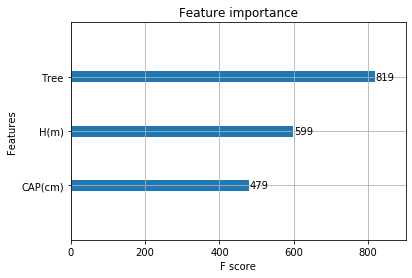

In [0]:
# fit model no training data
model = XGBClassifier()
model.fit(X, Y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [0]:
# para objeto de pesquisa deve-se tomar as medidas CAP no lugar de DAP por esta
# ser mais sensivel (PRINCIPIOS BASICOS DE DENDOMETRIA, pag. 18)
# http://esalqlastrop.com.br/img/aulas/24_principios_dendrometria.pdf

In [0]:
# circunferência à altura do peito (CAP) 
# DAP (diâmetro a altura do peito)

In [0]:
print(X.head())

   Tree  CAP(cm)        DAP  H(m)
0   105     62.0  19.735213   9.0
1    81     17.0   5.411268   5.0
2   105     64.0  20.371833  10.0
3   105     87.0  27.692960  11.0
4   103     33.0  10.504226  10.0


In [0]:
Xt, Xv, yt, yv = train_test_split(X, Y, test_size = 0.25, random_state = 0)
Xt=np.array(Xt);yt=np.array(yt);Xv=np.array(Xv);yv=np.array(yv);


In [0]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

xgb_model.fit(Xt, yt)

y_pred = xgb_model.predict(Xv)

cm, precision, recall=Go2Confusion.Confusao(yv,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print(cm)
print("precisao",precision)
print("recall",recall)

[[144   0   4   8]
 [  1  36   0   0]
 [  5   0  24   5]
 [ 52   0   5  12]]
precisao [0.71287129 1.         0.72727273 0.48      ]
recall [0.92307692 0.97297297 0.70588235 0.17391304]


In [0]:
print(XY.describe())

               Par      CAP(cm)          DAP         H(m)         Tree
count  1182.000000  1182.000000  1182.000000  1182.000000  1182.000000
mean     12.192047    36.549915    11.634199     9.360998    55.414552
std       7.225613    20.179981     6.423487     4.965058    26.921356
min       1.000000    16.000000     5.092958     2.000000     0.000000
25%       6.000000    21.000000     6.684508     6.000000    42.000000
50%      12.000000    30.000000     9.549297     8.000000    50.000000
75%      19.000000    48.000000    15.278875    11.000000    81.000000
max      24.000000   145.000000    46.154933    22.000000   107.000000


In [0]:
print(np.array(XY['Est']))

[1 1 1 ... 1 1 1]


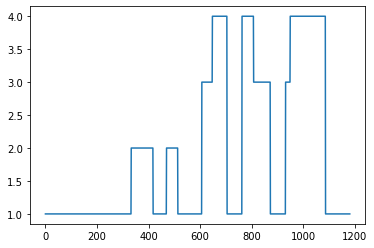

In [0]:
plt.plot(Y)